# Niboon Boonprakob 61340500038

# Object Recognition

The objective of this lab is very simple, to recognize objects in images. You will be working with a well-known dataset called CIFAR-10.

You can learn more about this dataset and download it here:

https://www.cs.toronto.edu/~kriz/cifar.html

In the webpage above, they also included a few publications based on CIFAR-10 data, which showed some amazing accuracies. The worst network on the page (a shallow convolutional neural network) can classify images with rouhgly 75% accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Write a function to load data

The dataset webpage in the previous section also provide a simple way to load data from your harddrive using pickle. You may use their function for this exercise.

Construct two numpy arrays for train images and train labels from data_batch_1 to data_batch_5. Then, construct two numpy arrays for test images, and test labels from test batch file. The original image size is 32 x 32 x 3. You may flatten the arrays so the final arrays are of size 1 x 3072.

In [2]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU

assert len(tf.config.list_physical_devices('GPU')) > 0

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
pictures=[]
labels = []
for i in range(5):
  file = "/content/drive/MyDrive/Colab Notebooks/Lab 3/dataset/cifar-10-batches-py/data_batch_" + f"{i+1}"
  # print(file)
  dataset = unpickle(file)
  pictures.append(dataset[b"data"] )
  labels += dataset[b"labels"]
# print(np.array(pictures).shape)
pictures = np.concatenate(np.array(pictures) , axis = 0)
# print(path)

In [5]:
dataset

{b'batch_label': b'training batch 5 of 5',
 b'data': array([[255, 252, 253, ..., 173, 231, 248],
        [127, 126, 127, ..., 102, 108, 112],
        [116,  64,  19, ...,   7,   6,   5],
        ...,
        [ 35,  40,  42, ...,  77,  66,  50],
        [189, 186, 185, ..., 169, 171, 171],
        [229, 236, 234, ..., 173, 162, 161]], dtype=uint8),
 b'filenames': [b'compact_car_s_001706.png',
  b'icebreaker_s_001689.png',
  b'peke_s_000545.png',
  b'convertible_s_000520.png',
  b'domestic_dog_s_000455.png',
  b'broodmare_s_000313.png',
  b'capreolus_capreolus_s_001380.png',
  b'true_cat_s_000886.png',
  b'cruiser_s_000163.png',
  b'ostrich_s_001561.png',
  b'buckskin_s_000031.png',
  b'cassowary_s_002024.png',
  b'fighter_aircraft_s_001009.png',
  b'convertible_s_000295.png',
  b'lapdog_s_001489.png',
  b'delivery_truck_s_001300.png',
  b'rana_pipiens_s_000379.png',
  b'ostrich_s_000026.png',
  b'fighter_aircraft_s_000720.png',
  b'supertanker_s_000275.png',
  b'ostrich_s_000147.png',
 

In [6]:
pictures 

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [7]:
labels 

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [8]:
len(pictures) , len(labels)

(50000, 50000)

In [9]:
pictures.shape

(50000, 3072)

# 2. Classify Dogs v.s. Cats

Let’s start simple by creating logistic regression model to classify images. We will select only two classes of images for this exercise.

1. From 50,000 train images and 10,000 test images, we want to reduce the data size. Write code to filter only dog images (label = 3) and cat images (label = 5).
2. Create a logistic regression model to classify cats and dogs. Report your accuracy.

In [10]:
labels.index(3)

9

In [11]:
dog_labels = []
dog_img = []
cat_labels= []
cat_img = []

element_dog = 3
element_cat = 5

for i in range(len(labels)):
  if (labels[i] ==  element_dog):
    dog_labels.append(labels[i])
    dog_img.append(pictures[i])
  elif (labels[i] == element_cat):
    cat_labels.append(labels[i])
    cat_img.append(pictures[i])


In [ ]:
np.array(dog_img).shape , np.array(cat_img).shape

((5000, 3072), (5000, 3072))

In [ ]:
img_all = [cat_img ,dog_img]
# np.array(img_all).shape
d_c_img = np.concatenate(np.array(img_all),axis = 0)

In [ ]:
d_c_img.shape

(10000, 3072)

In [ ]:
labels_all = [cat_labels,dog_labels]
d_c_label = np.concatenate(np.array(labels_all),axis=0)


In [ ]:
d_c_label.shape

(10000,)

## import test_batch

In [ ]:
test = "/content/drive/MyDrive/Colab Notebooks/Lab 3/dataset/cifar-10-batches-py/test_batch"
y_test = unpickle(test)
y_test_data = y_test[b"data"]
y_test_labels = y_test[b"labels"]


In [ ]:
len(y_test_data) , len(y_test_labels)

(10000, 10000)

In [ ]:
# T : images , t:labels
T_y_test_dog = []
T_y_test_cat = []
t_y_test_dog = []
t_y_test_cat = []
element_dog = 3
element_cat = 5
for i in range(len(y_test_labels)):
  if (y_test_labels[i] == element_cat):
    t_y_test_cat.append(y_test_labels[i])
    T_y_test_cat.append(y_test_data[i])
  elif (y_test_labels[i] == element_dog):
    T_y_test_dog.append(y_test_data[i])
    t_y_test_dog.append(y_test_labels[i])

# y_test  dc_img_test : x_test , dc_labels_test : y_test
img_y_test = [T_y_test_dog , T_y_test_cat]
labels_y_test = [t_y_test_dog , t_y_test_cat]
dc_img_test = np.concatenate(np.array(img_y_test),axis = 0)
dc_labels_test = np.concatenate(np.array(labels_y_test),axis=0)
print(dc_img_test.shape , dc_labels_test.shape)

(2000, 3072) (2000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=1000).fit(d_c_img, d_c_label)
y_pred = clf.predict(dc_img_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(dc_labels_test , y_pred)}")

Accuracy: 0.561


# 3. The Real Challenge

The majority of your score for this lab will come from this real challenge. You are going to construct a neural network model to classify 10 classes of images from CIFAR-10 dataset. You will get half the credits for this one if you complete the assignment, and will get another half if you can exceed the target accuracy of 75%. (You may use any combination of sklearn, opencv, or tensorflow to do this exercise).

Design at least 3 variants of neural network models. Each model should have different architectures. (Do not vary just a few parameters, the architecture of the network must change in each model). In your notebook, explain your experiments in details and display the accuracy score for each experiment.

In [ ]:
### load dataset ###

# X_train : pictures 
# y_train : labels 
# X_test : y_test_data 
# y_test : y_test_labels 

In [ ]:
pictures.shape

(50000, 3072)

In [ ]:
X_train = []
X_test = []
for i in range(len(pictures)):
  img = np.reshape(pictures[i], (3,32,32))
  X_train.append(np.transpose(img, (1, 2, 0)))
print(X_train[0].shape)

for i in range(len(y_test_data)):
  img = np.reshape(y_test_data[i], (3,32,32))
  X_test.append(np.transpose(img, (1, 2, 0)))
y_train = labels
y_test = y_test_labels 

(32, 32, 3)


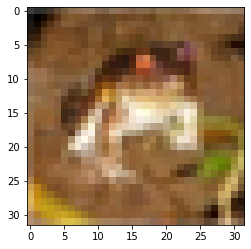

6


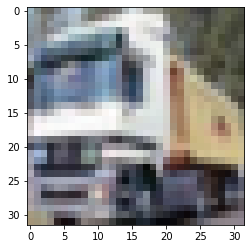

9


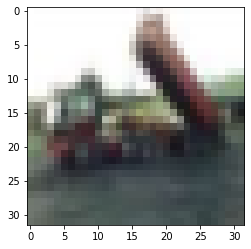

9


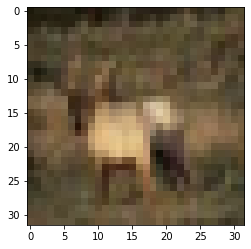

4


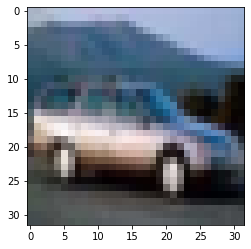

1


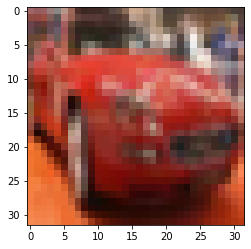

1


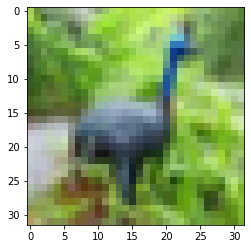

2


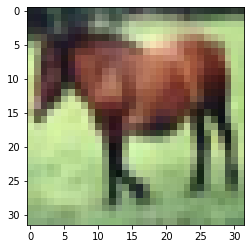

7


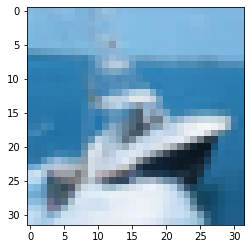

8


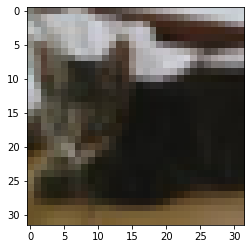

3


In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(X_train[i])
  plt.show()
  print(y_train[i])

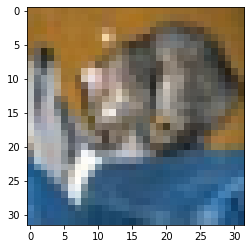

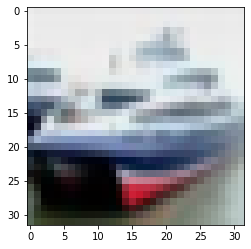

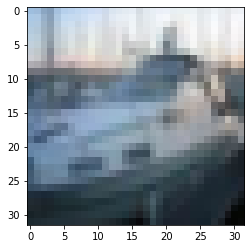

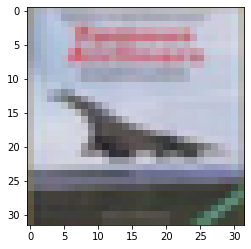

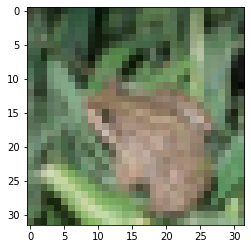

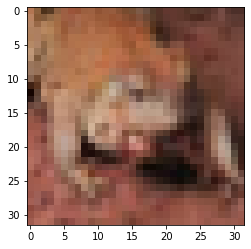

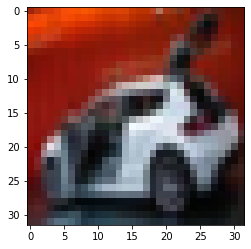

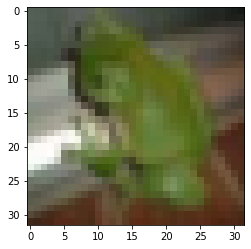

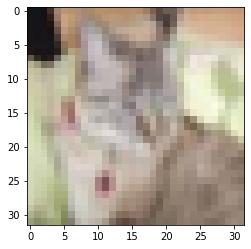

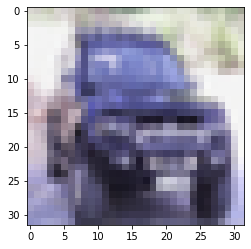

In [ ]:
for i in range(10):
  plt.imshow(X_test[i])
  plt.show()

In [ ]:
# 0->1 

train_images = (np.expand_dims(X_train, axis=-1)/255.).astype(np.float32)
# train_labels = (y_train).astype(np.int64)
test_images = (np.expand_dims(X_test, axis=-1)/255.).astype(np.float32)
# test_labels = (y_test ).astype(np.int64)


In [ ]:
train_images = train_images.reshape(train_images.shape[:-1])
print(train_images.shape)

(50000, 32, 32, 3)


In [ ]:
test_images= test_images.reshape(test_images.shape[:-1])
print(test_images.shape)

(10000, 32, 32, 3)


In [ ]:
def define_model():
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.MaxPooling2D((2, 2)))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(tf.keras.layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
model = define_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
y_train = lb.transform(labels)
y_test = lb.transform(y_test_labels)

In [ ]:
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
print(train_images)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [ ]:
test_images.shape  

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 10)

## Variable 
 * X_train : train_images
 * y_train : np.array(y_train)
 * X_test : test_images
 * y_test : y_test

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 100 # 
EPOCHS = 40

'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
H = model.fit(train_images,np.array(y_train), validation_data=(test_images , y_test),batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/40
500/500 [==============================] - 3s 5ms/step - loss: 1.8241 - accuracy: 0.3541 - val_loss: 1.6231 - val_accuracy: 0.4260
Epoch 2/40
500/500 [==============================] - 2s 4ms/step - loss: 1.4876 - accuracy: 0.4704 - val_loss: 1.4034 - val_accuracy: 0.4980
Epoch 3/40
500/500 [==============================] - 2s 4ms/step - loss: 1.3434 - accuracy: 0.5236 - val_loss: 1.3056 - val_accuracy: 0.5352
Epoch 4/40
500/500 [==============================] - 2s 4ms/step - loss: 1.2596 - accuracy: 0.5570 - val_loss: 1.2358 - val_accuracy: 0.5609
Epoch 5/40
500/500 [==============================] - 2s 4ms/step - loss: 1.1949 - accuracy: 0.5819 - val_loss: 1.1951 - val_accuracy: 0.5792
Epoch 6/40
500/500 [==============================] - 2s 4ms/step - loss: 1.1379 - accuracy: 0.6023 - val_loss: 1.1488 - val_accuracy: 0.5934
Epoch 7/40
500/500 [==============================] - 2s 4ms/step - loss: 1.0909 - accuracy: 0.6173 - val_loss: 1.1368 - val_accuracy: 0.5979
Epoch 

# Evaluate accuracy on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_images , y_test)# TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.5499 - accuracy: 0.6596
Test accuracy: 0.659600019454956


In [ ]:
import sys
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.show()

In [ ]:
print(H.history)

{'loss': [1.8241266012191772, 1.4876279830932617, 1.343402624130249, 1.2595564126968384, 1.1949219703674316, 1.1378787755966187, 1.0909010171890259, 1.0409411191940308, 1.001021146774292, 0.9599418640136719, 0.925335705280304, 0.8820815086364746, 0.8483354449272156, 0.810336709022522, 0.7787525653839111, 0.7507606148719788, 0.7111119031906128, 0.6862810254096985, 0.6480662822723389, 0.6203339099884033, 0.5872994661331177, 0.559696614742279, 0.5289755463600159, 0.4953438937664032, 0.4726831614971161, 0.44025900959968567, 0.41333696246147156, 0.38063371181488037, 0.35253390669822693, 0.32717305421829224, 0.2977215647697449, 0.270526260137558, 0.2476857602596283, 0.227588951587677, 0.19875311851501465, 0.1770431250333786, 0.1581188440322876, 0.14254115521907806, 0.12238401174545288, 0.10766598582267761], 'accuracy': [0.35405999422073364, 0.4703800082206726, 0.523639976978302, 0.5569999814033508, 0.5819000005722046, 0.6022599935531616, 0.6173200011253357, 0.6372399926185608, 0.650940001010

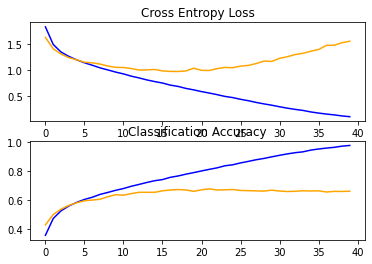

In [ ]:
summarize_diagnostics(H)

##reference
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [ ]:
# define cnn model
def define_model2():
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.MaxPooling2D((2, 2)))
	model.add(tf.keras.layers.Dropout(0.2))
	model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.MaxPooling2D((2, 2)))
	model.add(tf.keras.layers.Dropout(0.2))
	model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(tf.keras.layers.MaxPooling2D((2, 2)))
	model.add(tf.keras.layers.Dropout(0.2))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(tf.keras.layers.Dropout(0.2))
	model.add(tf.keras.layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [ ]:
model2 = define_model2()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
BATCH_SIZE = 100 # 
EPOCHS = 40

'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
H = model2.fit(train_images,np.array(y_train), validation_data=(test_images , y_test),batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/40
500/500 [==============================] - 4s 7ms/step - loss: 2.0894 - accuracy: 0.2239 - val_loss: 1.8062 - val_accuracy: 0.3672
Epoch 2/40
500/500 [==============================] - 4s 7ms/step - loss: 1.7696 - accuracy: 0.3501 - val_loss: 1.6139 - val_accuracy: 0.4131
Epoch 3/40
500/500 [==============================] - 4s 7ms/step - loss: 1.6299 - accuracy: 0.4024 - val_loss: 1.4927 - val_accuracy: 0.4573
Epoch 4/40
500/500 [==============================] - 4s 7ms/step - loss: 1.5320 - accuracy: 0.4385 - val_loss: 1.4038 - val_accuracy: 0.4933
Epoch 5/40
500/500 [==============================] - 4s 7ms/step - loss: 1.4709 - accuracy: 0.4601 - val_loss: 1.3716 - val_accuracy: 0.5079
Epoch 6/40
500/500 [==============================] - 4s 7ms/step - loss: 1.4003 - accuracy: 0.4880 - val_loss: 1.2995 - val_accuracy: 0.5288
Epoch 7/40
500/500 [==============================] - 4s 7ms/step - loss: 1.3449 - accuracy: 0.5112 - val_loss: 1.2440 - val_accuracy: 0.5522
Epoch 

In [ ]:
test_loss, test_acc = model2.evaluate(test_images , y_test)# TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6500 - accuracy: 0.7752
Test accuracy: 0.7752000093460083


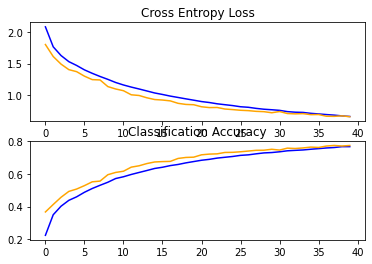

In [ ]:
summarize_diagnostics(H)

Class image :  4
Label of this digit is: [0 0 0 1 0 0 0 0 0 0]


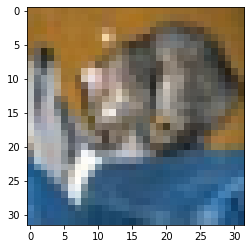

Class image :  9
Label of this digit is: [0 0 0 0 0 0 0 0 1 0]


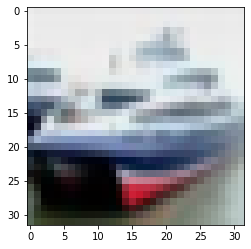

Class image :  9
Label of this digit is: [0 0 0 0 0 0 0 0 1 0]


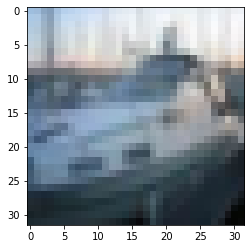

Class image :  1
Label of this digit is: [1 0 0 0 0 0 0 0 0 0]


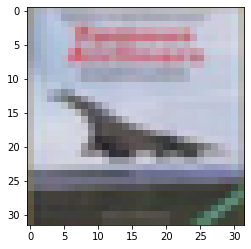

Class image :  7
Label of this digit is: [0 0 0 0 0 0 1 0 0 0]


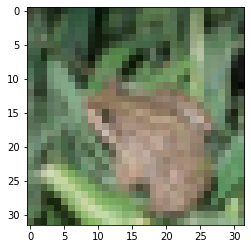

Class image :  7
Label of this digit is: [0 0 0 0 0 0 1 0 0 0]


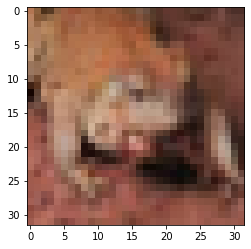

Class image :  2
Label of this digit is: [0 1 0 0 0 0 0 0 0 0]


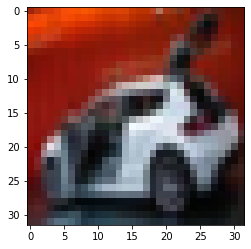

Class image :  7
Label of this digit is: [0 0 0 0 0 0 1 0 0 0]


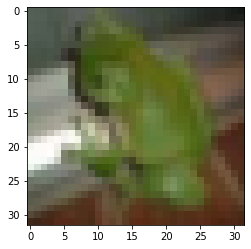

Class image :  4
Label of this digit is: [0 0 0 1 0 0 0 0 0 0]


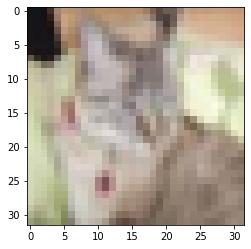

Class image :  2
Label of this digit is: [0 1 0 0 0 0 0 0 0 0]


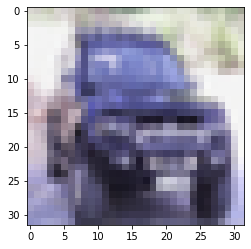

In [ ]:
for i in range(10):
  predictions = model2.predict(np.array([test_images[i]]))
  prediction = np.argmax(predictions[0])# TODO
  print(f"Class image :  {prediction +1}")
  print("Label of this digit is:", y_test[i])
  plt.imshow(test_images[i,:,:], cmap=plt.cm.binary)
  plt.show()

In [ ]:
# predictions = model2.predict(np.array([test_images[2]]))

In [ ]:
# predictions

array([[8.0983527e-03, 6.2280190e-03, 9.2255854e-05, 1.2325000e-03,
        3.0086128e-05, 2.9635085e-05, 1.0467141e-05, 7.0712020e-05,
        9.7792393e-01, 6.2839459e-03]], dtype=float32)

In [ ]:
# prediction = np.argmax(predictions[0])# TODO
# print(f"Class image :  {prediction +1}")

Class image :  9


Label of this digit is: [0 0 0 0 0 0 0 0 1 0]


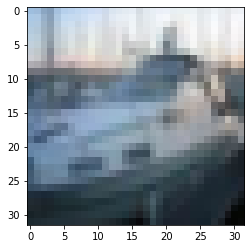

In [ ]:
# print("Label of this digit is:", y_test[2])
# plt.imshow(test_images[2,:,:], cmap=plt.cm.binary)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11052314551703897330, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16183459840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10008767861492315563
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]